<a href="https://colab.research.google.com/github/Divyanshi-2211/Classification-Model/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

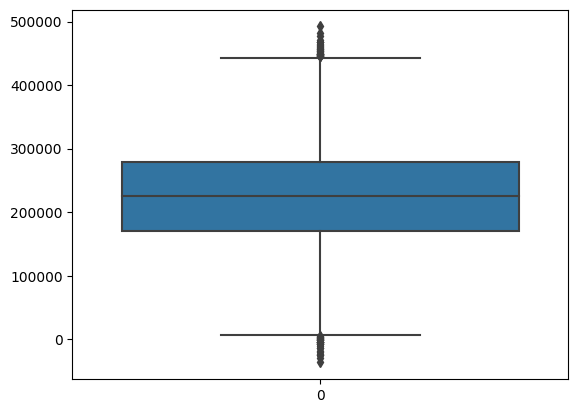

In [ ]:
sns.boxplot(df["Price"])

In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df['Bedrooms'].unique()

array([4, 3, 2, 5])

<Axes: xlabel='Bedrooms', ylabel='count'>

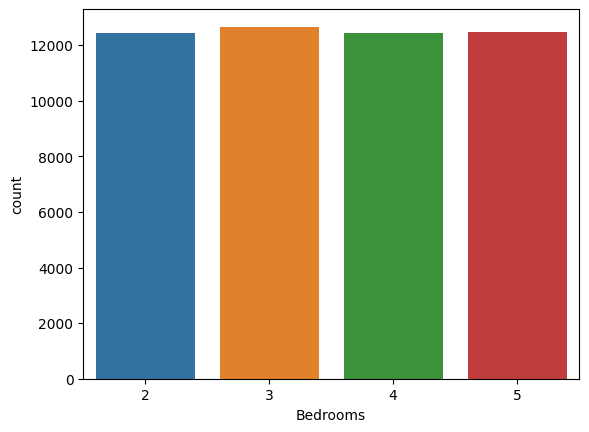

In [ ]:
sns.countplot(x = df['Bedrooms'])

In [ ]:
df['Bathrooms'].unique()

array([1, 2, 3])

1    16755
2    16719
3    16526
Name: Bathrooms, dtype: int64


<Axes: xlabel='Bathrooms', ylabel='count'>

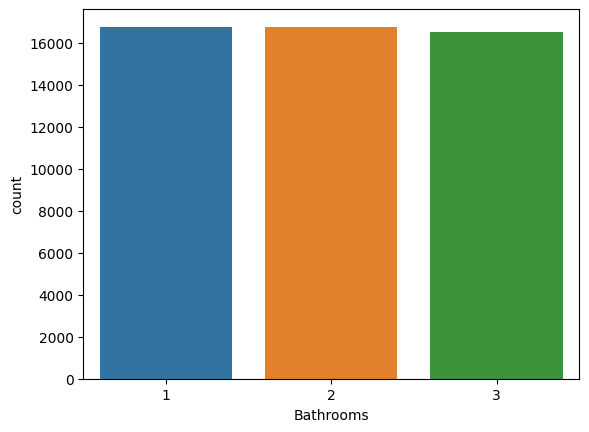

In [ ]:
print(df['Bathrooms'].value_counts())
sns.countplot(x = df['Bathrooms'])

In [ ]:
print(df['Neighborhood'].unique())

['Rural' 'Suburb' 'Urban']


In [ ]:
# dictionary mapping
dict = {'Rural' : 0, 'Suburb' : 1, 'Urban' : 2}
df['Neighborhood'] = df['Neighborhood'].map(dict)
df.head(15)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
5,2095,2,3,1,2020,198208.803907
6,2724,2,1,1,1993,343429.319110
7,2044,4,3,0,1957,184992.321268
8,2638,4,3,2,1959,377998.588152
9,1121,5,2,2,2004,95961.926014


In [ ]:
df['Neighborhood'].value_counts()

1    16721
0    16676
2    16603
Name: Neighborhood, dtype: int64

<Axes: xlabel='Neighborhood', ylabel='count'>

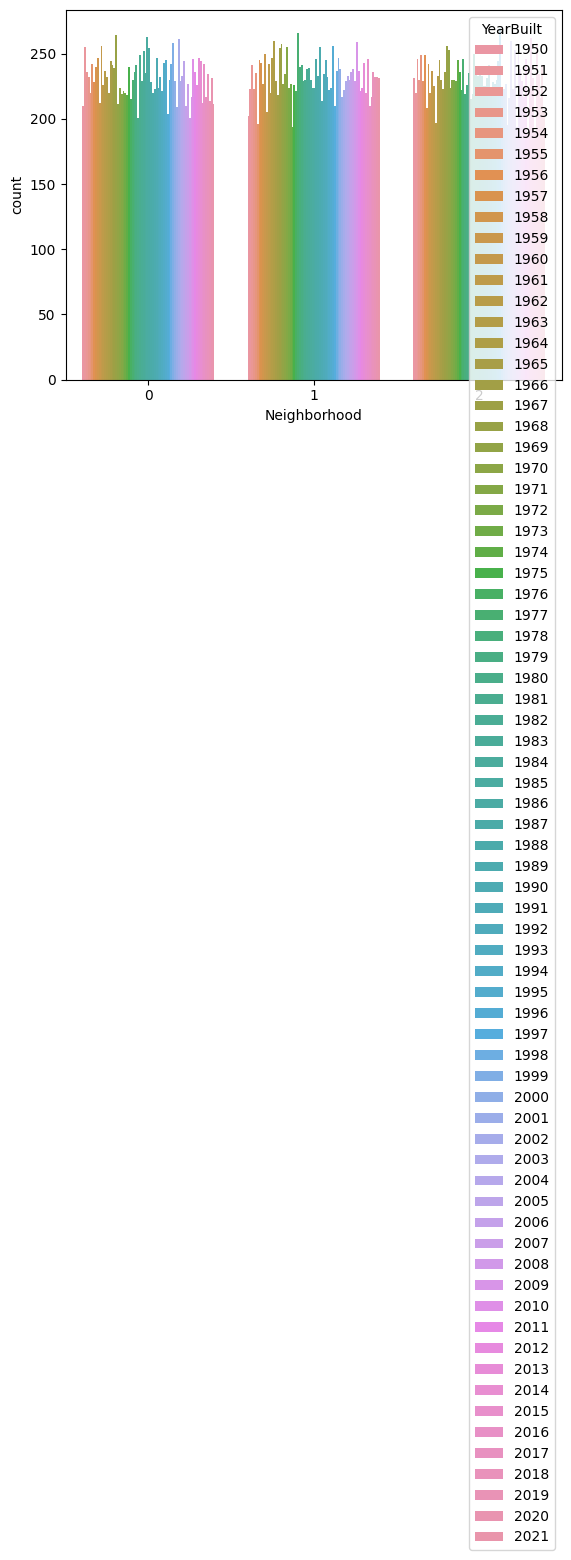

In [ ]:
sns.countplot(x = "Neighborhood", hue = 'YearBuilt', data = df)

<Axes: xlabel='Neighborhood', ylabel='count'>

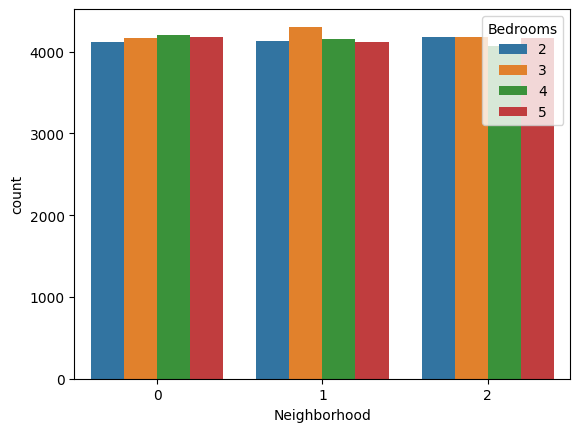

In [ ]:
sns.countplot(x = df['Neighborhood'], hue = df['Bedrooms'])

<Axes: xlabel='Neighborhood', ylabel='count'>

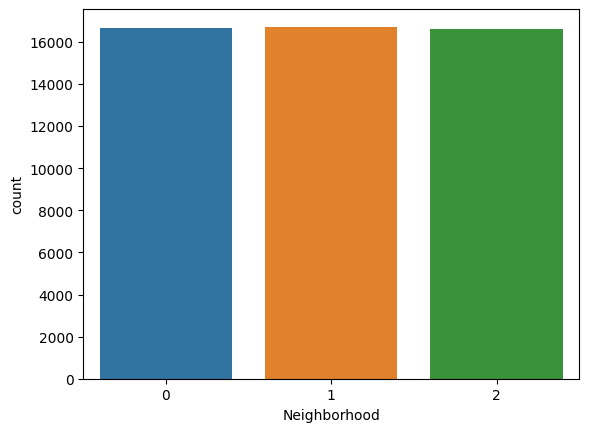

In [ ]:
sns.countplot(x = "Neighborhood", data = df)

In [ ]:
# check NaN or missing values
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
# correlation

df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


<Axes: >

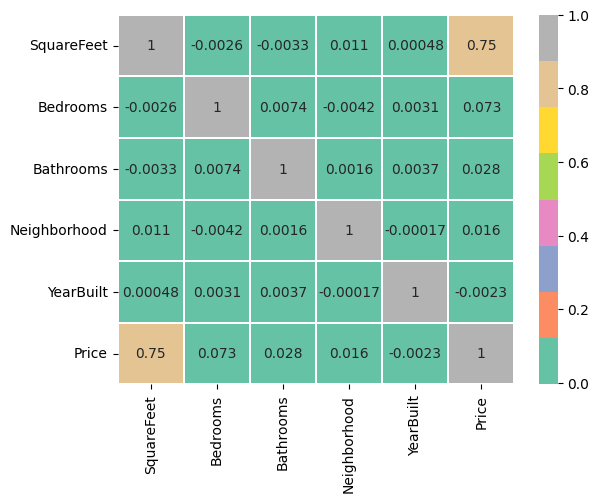

In [ ]:
sns.heatmap(df.corr(),annot = True, cmap = "Set2",linewidth = .1)

<Axes: >

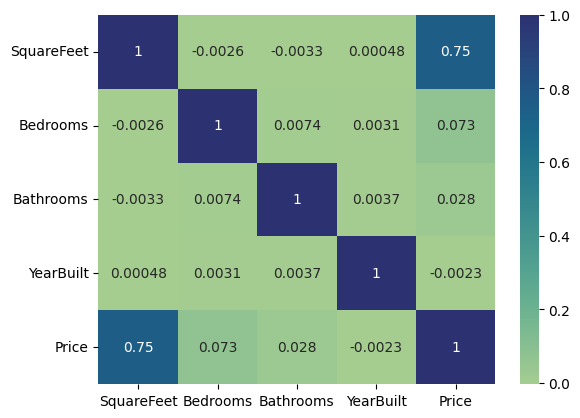

In [ ]:
sns.heatmap(df.drop(['Neighborhood'],axis=1).corr(), annot = True, cmap='crest')

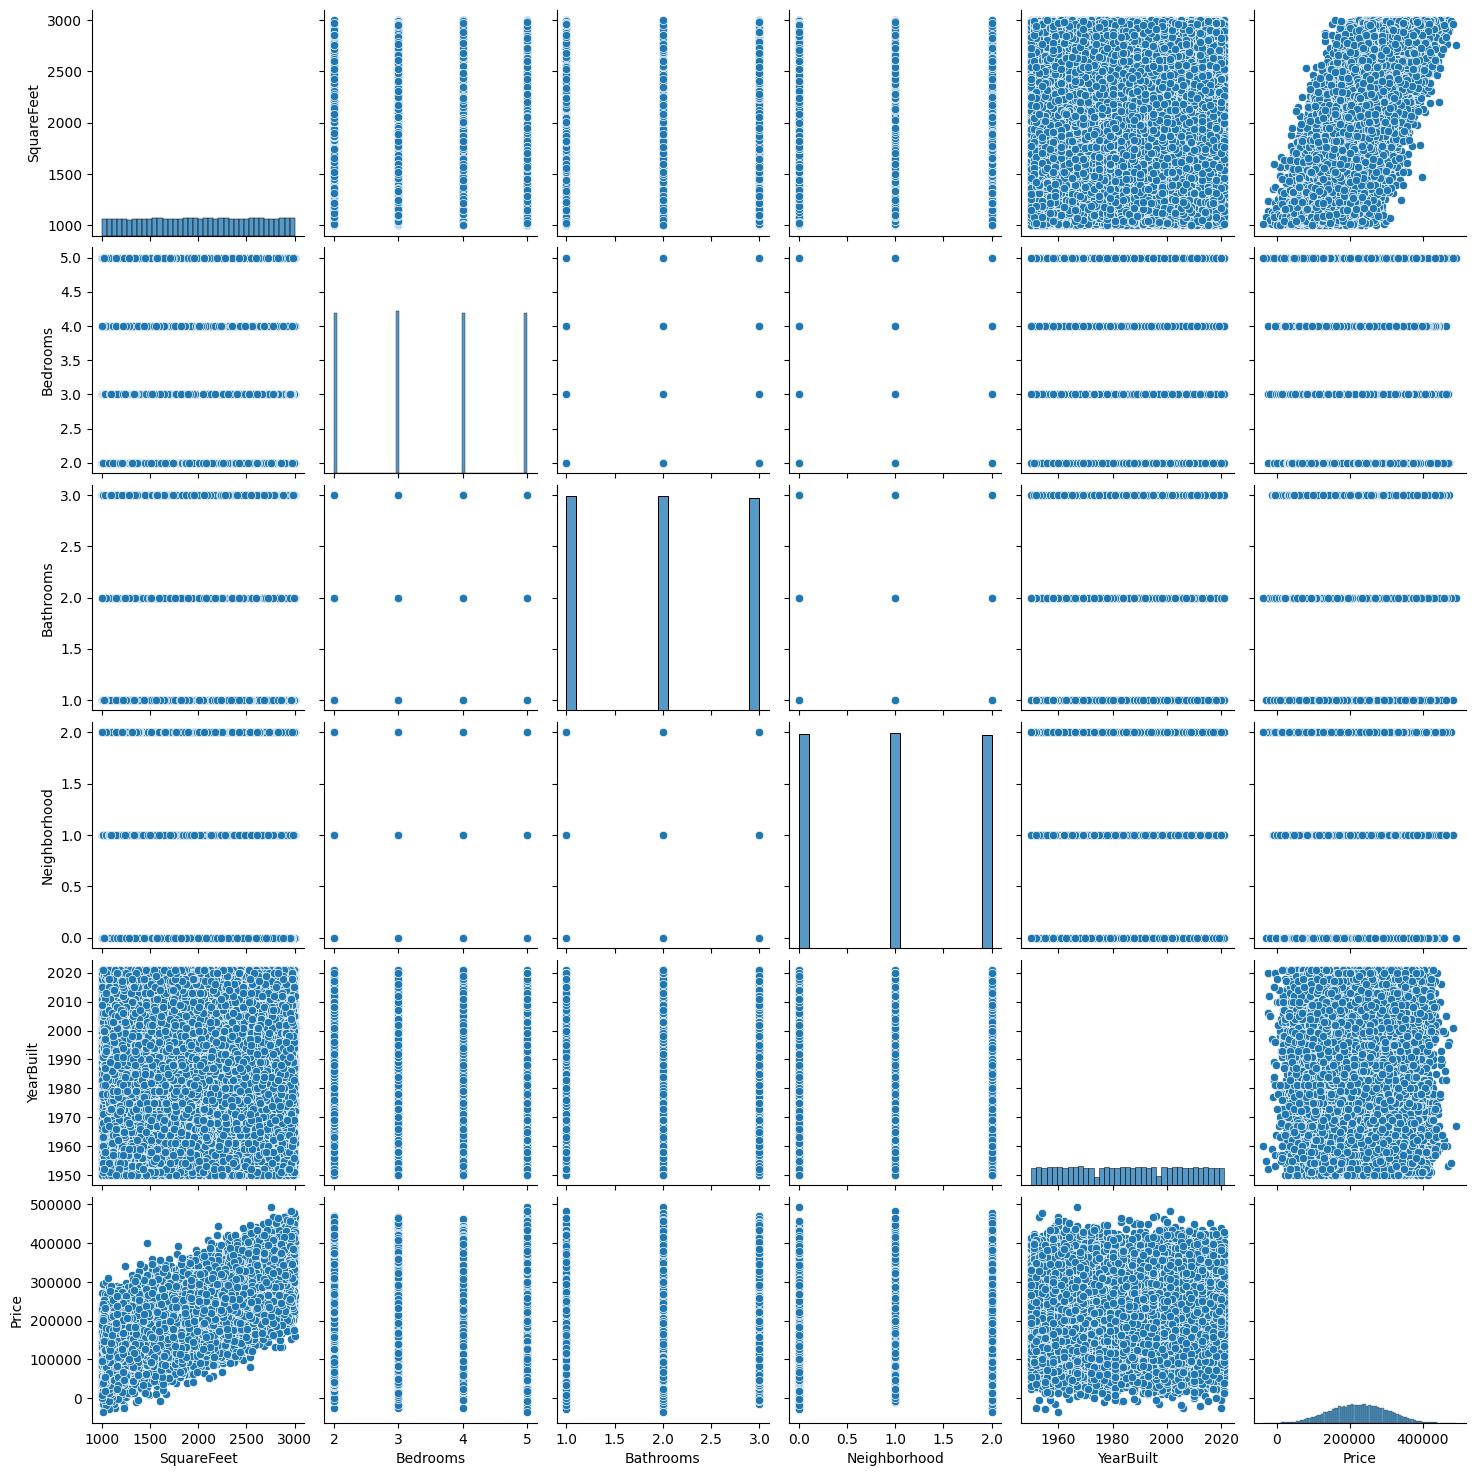

In [ ]:
sns.pairplot(df)

<Axes: xlabel='SquareFeet', ylabel='Price'>

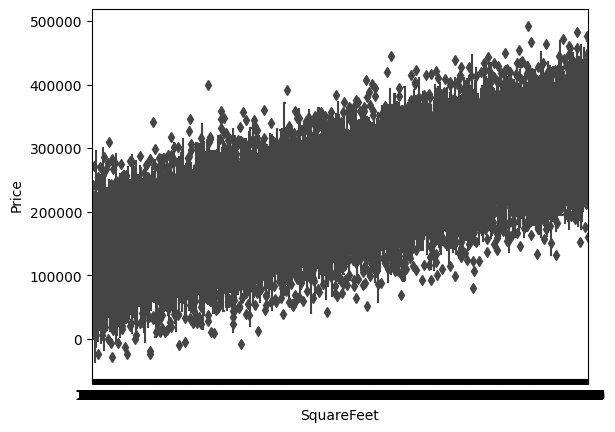

In [ ]:
sns.boxplot(x = 'SquareFeet', y = 'Price', data = df)

<Axes: xlabel='Bathrooms', ylabel='Bedrooms'>

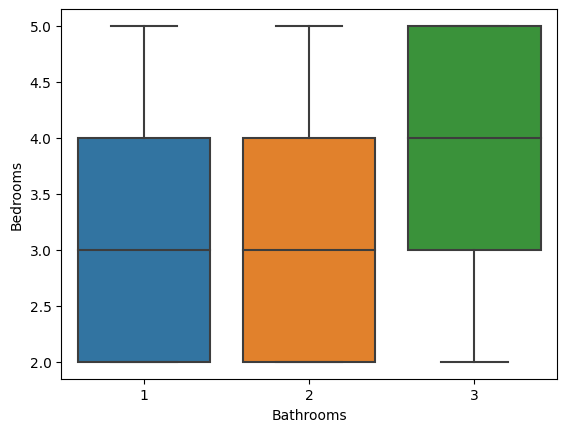

In [ ]:
sns.boxplot(x = df['Bathrooms'], y = df['Bedrooms'],data = df)

In [ ]:
# check the statistics of the dataset
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  int64  
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


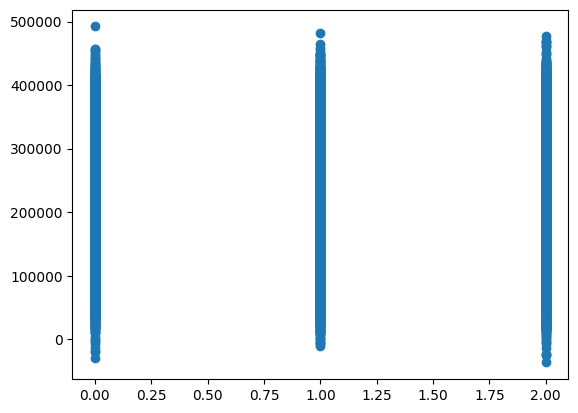

In [ ]:
plt.scatter(df['Neighborhood'],df['Price'])

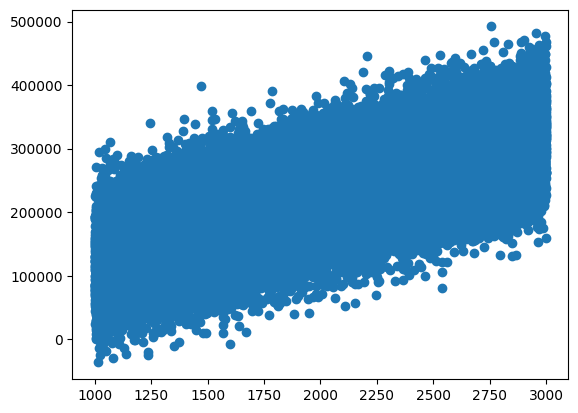

In [ ]:
plt.scatter(df['SquareFeet'],df['Price'])

In [ ]:
# check the dimension of the dataset
df.shape

(50000, 6)

In [ ]:
# define dependent and independent variable
y = df['Price']
x = df.drop(['Price'],axis = 1)

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
np.array(y)

array([215355.2836182 , 195014.22162585, 306891.01207633, ...,
       384110.55559035, 380512.68595684, 221618.58321807])

In [ ]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,0,1969
1,2459,3,2,0,1980
2,1860,2,1,1,1970
3,2294,2,1,2,1996
4,2130,5,2,1,2001
...,...,...,...,...,...
49995,1282,5,3,0,1975
49996,2854,2,2,1,1988
49997,2979,5,3,1,1962
49998,2596,5,2,0,1984


In [ ]:
# divide the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = None )

In [ ]:
x_train.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
4383,2327,5,2,1,1967
25569,2863,2,3,1,1991
17309,1087,5,1,2,1984
27051,1726,3,1,1,1953
22046,1764,4,1,0,1995
20825,1843,3,3,0,2018
42722,1768,2,3,0,1961
8493,2449,5,1,0,1975
29469,2759,4,1,2,1971
18776,1618,3,3,2,2006


In [ ]:
x_train.shape

(35000, 5)

In [ ]:
x_test.shape

(15000, 5)

In [ ]:
y_train.shape

(35000,)

In [ ]:
y_test.shape

(15000,)

In [ ]:
# imputation -> replacing missing value with mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x_imp = imp.fit_transform(x)
x_imp

array([[2.126e+03, 4.000e+00, 1.000e+00, 0.000e+00, 1.969e+03],
       [2.459e+03, 3.000e+00, 2.000e+00, 0.000e+00, 1.980e+03],
       [1.860e+03, 2.000e+00, 1.000e+00, 1.000e+00, 1.970e+03],
       ...,
       [2.979e+03, 5.000e+00, 3.000e+00, 1.000e+00, 1.962e+03],
       [2.596e+03, 5.000e+00, 2.000e+00, 0.000e+00, 1.984e+03],
       [1.572e+03, 5.000e+00, 3.000e+00, 0.000e+00, 2.011e+03]])

In [ ]:
# Standardisation of the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Performance measure
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)
print('Testing Performance')
print('MSE=',mse)
print('R2-Score=',r2)

Testing Performance
MSE= 46260125735.83105
R2-Score= -7.0602724988424015


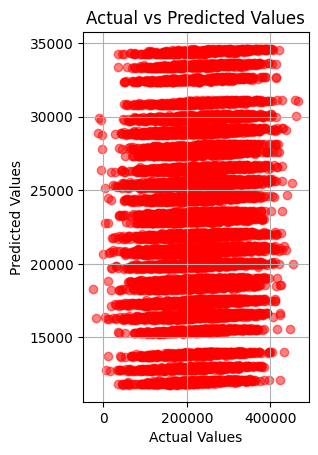

In [ ]:
# Plot actual vs predicted value
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)


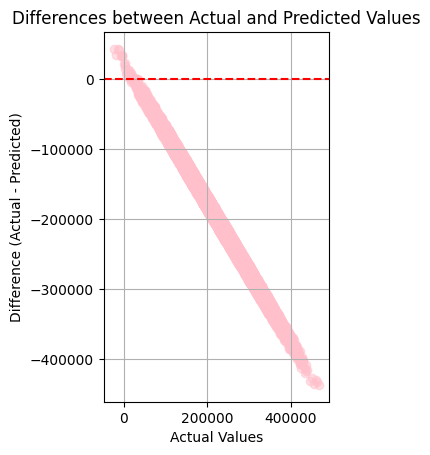

In [ ]:
# Plot difference between actual and predicted value

diff = y_pred_test-y_test
plt.subplot(1, 2, 2)
plt.scatter(y_test, diff, color='pink', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Differences between Actual and Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)